In [16]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Flatten, GRU, Bidirectional
from keras.datasets import imdb
from keras.utils import pad_sequences
sys.path.append('../')
from utils import acc_plot, loss_plot
plt.style.use('ggplot')

## How RNN works

In [3]:
timesteps = 100

in_features = 16
out_features = 32

xt = np.random.random((timesteps, in_features)) # input
state_t = np.zeros((out_features, ))

W = np.random.random((out_features, in_features))
U = np.random.random((out_features, out_features))
b = np.random.random((out_features))

succ_output = []

for xi in xt:
    yi = np.tanh(np.dot(W, xi) + np.dot(U, state_t) + b)
    succ_output.append(yi)
    state_t = yi

final_out_seq = np.concatenate(succ_output, axis=0)

final_out_seq.shape

(3200,)

## SimpleRNN
Keras equivalent of above process with a little difference - it works on batches of sequences

In [4]:
# All recurrent layers can work in one of the two modes - they can either return full sequences: tensor shape (batch_size, timesteps, out_features)
# or only last objects: (batch_size, out_features)
model = Sequential([
    Embedding(10000, 32),
    SimpleRNN(32, return_sequences=True),
    SimpleRNN(32, return_sequences=True),
    SimpleRNN(32, return_sequences=True)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 326,240
Trainable params: 326,240
Non-trainable params: 0
_________________________________________________________________


Sometimes is good to create few recurrent layers

#### Movie review classification

In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [12]:
model = Sequential([
    Embedding(max_features, 32),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
157/157 [==============================] - 14s 83ms/step - loss: 0.6577 - accuracy: 0.5944 - val_loss: 0.5967 - val_accuracy: 0.6780
Epoch 2/10
157/157 [==============================] - 13s 84ms/step - loss: 0.4279 - accuracy: 0.8166 - val_loss: 0.4038 - val_accuracy: 0.8250
Epoch 3/10
157/157 [==============================] - 12s 80ms/step - loss: 0.2544 - accuracy: 0.9003 - val_loss: 0.3862 - val_accuracy: 0.8374
Epoch 4/10
157/157 [==============================] - 12s 79ms/step - loss: 0.1562 - accuracy: 0.9457 - val_loss: 0.4235 - val_accuracy: 0.8276
Epoch 5/10
157/157 [==============================] - 13s 82ms/step - loss: 0.0848 - accuracy: 0.9758 - val_loss: 0.4669 - val_accuracy: 0.8398
Epoch 6/10
157/157 [==============================] - 14s 90ms/step - loss: 0.0390 - accuracy: 0.9915 - val_loss: 0.5205 - val_accuracy: 0.8288
Epoch 7/10
157/157 [==============================] - 13s 84ms/step - loss: 0.0261 - accuracy: 0.9942 - val_loss: 0.5939 - val_accuracy:

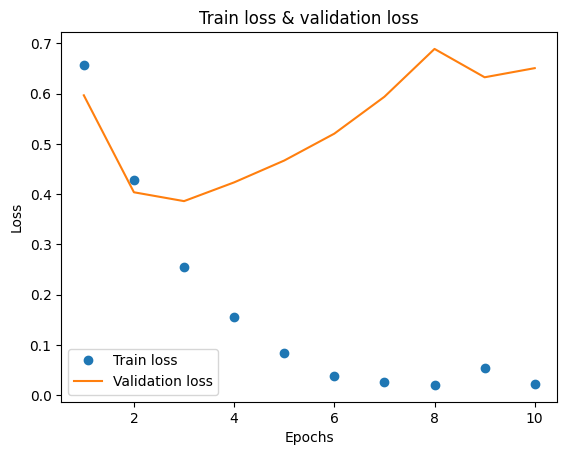

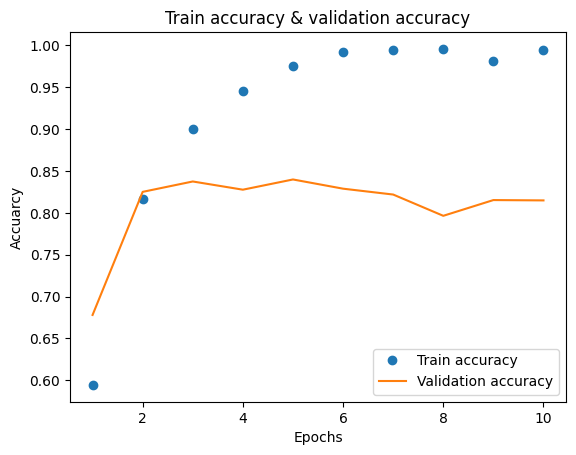

In [15]:
history_dict = history.history
loss_plot(history_dict, epochs=10)
acc_plot(history_dict, epochs=10)

## LSTM

In [4]:
model = Sequential([
    Embedding(max_features, 32),
    LSTM(units=32),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Each LSTM unit stores a hidden state that is updated at each time step. The greater the number of units, the greater the memory capacity of the network
# and the greater the ability to detect complex temporal relationships in data sequences. A lot of units may cause overftitting.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(
    X_train,
    y_train,
    batch_size=256,
    epochs=7,
    validation_split=0.2
)

Epoch 1/7


2023-03-12 12:30:14.723028: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-03-12 12:30:14.859139: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-12 12:30:14.897552: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f3f7825e3e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-12 12:30:14.897628: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2023-03-12 12:30:14.903758: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


 1/79 [..............................] - ETA: 3:04 - loss: 0.6933 - accuracy: 0.5078

2023-03-12 12:30:15.039201: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


79/79 [==============================] - 11s 108ms/step - loss: 0.5697 - accuracy: 0.7133 - val_loss: 0.3872 - val_accuracy: 0.8392
Epoch 2/7
79/79 [==============================] - 8s 107ms/step - loss: 0.2971 - accuracy: 0.8869 - val_loss: 0.3120 - val_accuracy: 0.8700
Epoch 3/7
79/79 [==============================] - 7s 87ms/step - loss: 0.2091 - accuracy: 0.9270 - val_loss: 0.3250 - val_accuracy: 0.8766
Epoch 4/7
79/79 [==============================] - 7s 84ms/step - loss: 0.1574 - accuracy: 0.9487 - val_loss: 0.3084 - val_accuracy: 0.8828
Epoch 5/7
79/79 [==============================] - 5s 63ms/step - loss: 0.1259 - accuracy: 0.9613 - val_loss: 0.3214 - val_accuracy: 0.8774
Epoch 6/7
79/79 [==============================] - 5s 63ms/step - loss: 0.1144 - accuracy: 0.9653 - val_loss: 0.3738 - val_accuracy: 0.8764
Epoch 7/7
79/79 [==============================] - 4s 52ms/step - loss: 0.0945 - accuracy: 0.9708 - val_loss: 0.4292 - val_accuracy: 0.8734


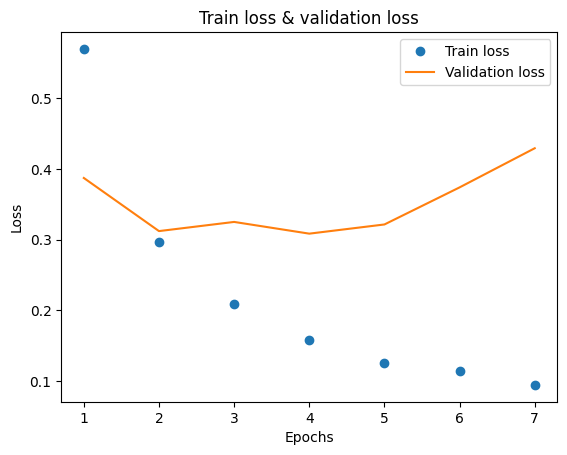

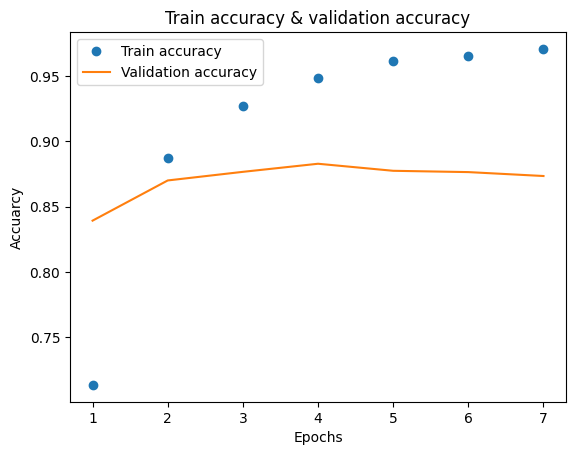

In [6]:
history_dict = history.history
loss_plot(history_dict, epochs=7)
acc_plot(history_dict, epochs=7)

LSTM are mainly suited for more complex tasks such as machine translation or chats

## Working with weather sequence data

In [3]:
df = pd.read_csv('jena_climate_2009_2016.csv')
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420446,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420447,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420448,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420449,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


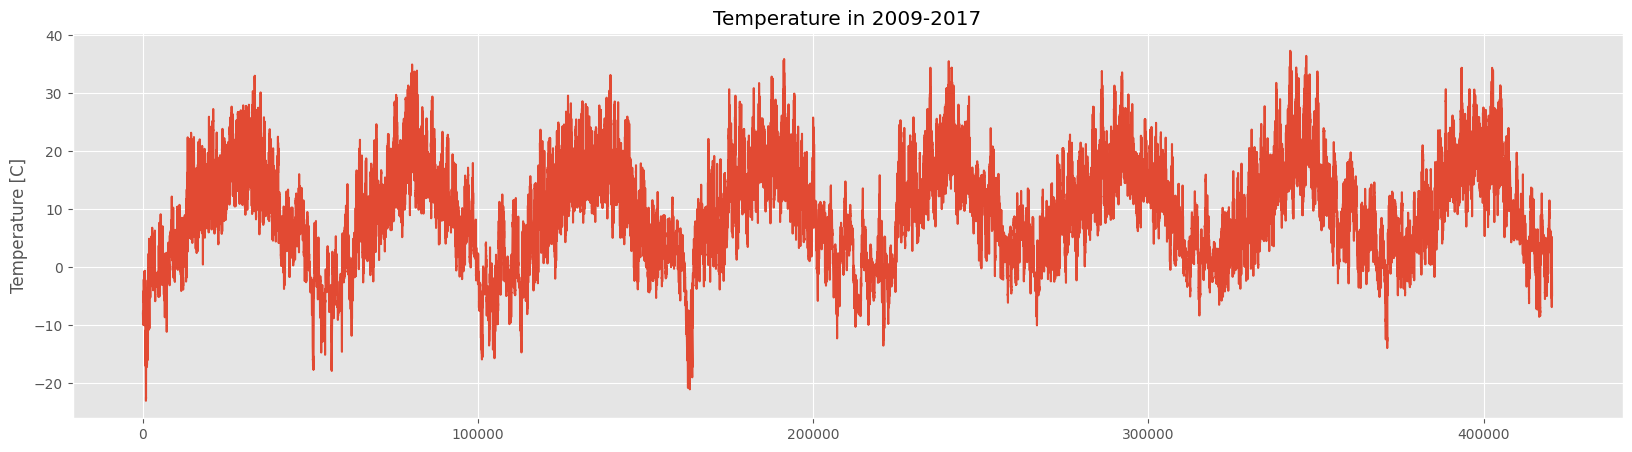

In [4]:
x = np.arange(len(df))
t = df['T (degC)']

plt.figure(figsize=(20,5))
plt.title('Temperature in 2009-2017')
plt.ylabel('Temperature [C]')
plt.plot(x,t)
plt.show()

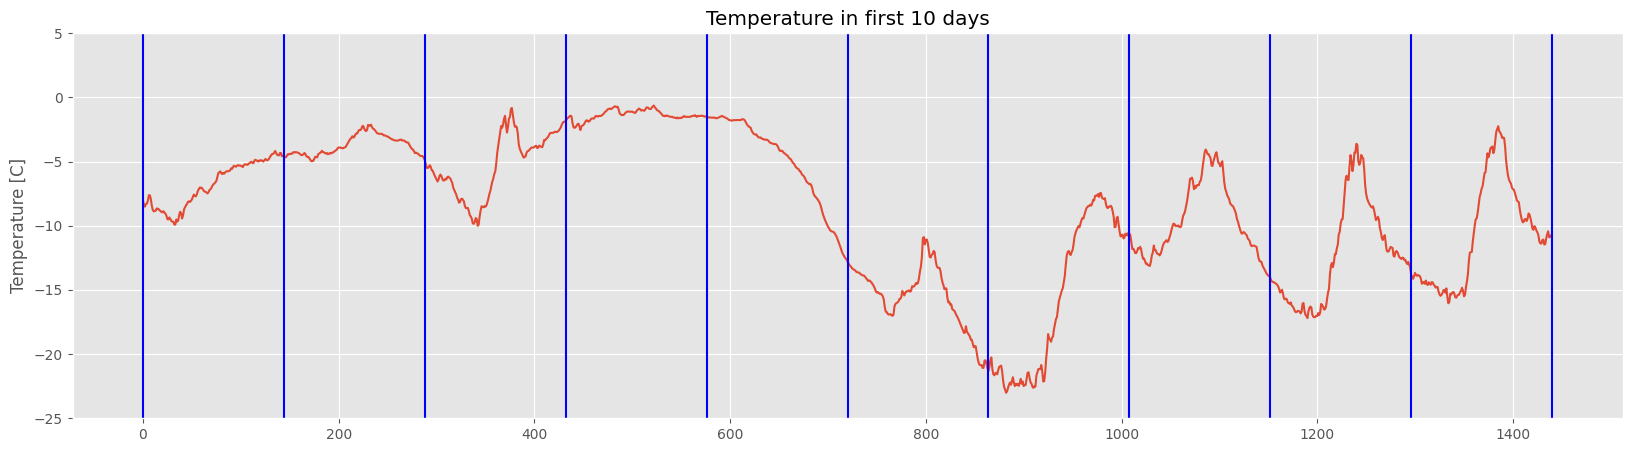

In [5]:
t_10 = t[:1440] # 10  first 10 days - sample each 10min
x_10 = np.arange(1440)
ymin = -25
ymax = 5


plt.figure(figsize=(20,5))
plt.title('Temperature in first 10 days')
plt.ylim(ymin, ymax)
plt.ylabel('Temperature [C]')
plt.plot(x_10,t_10)
for d in range(0, 1441, 144):
    plt.vlines(ymin=ymin, ymax=ymax, x=d, colors='b')
plt.show()

## Normalization

In [6]:
df = pd.read_csv('jena_climate_2009_2016.csv')
df.drop(['Date Time'], axis=1, inplace=True)
means = df[:200000].mean(axis=0)
stds = df[:200000].std(axis=0)
df = (df - means) / stds
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,0.900145,-1.931354,-1.982105,-1.862796,1.072850,-1.307418,-1.473754,-0.798684,-1.476264,-1.478152,2.123745,-0.729503,-0.780678,-0.276135
1,0.906041,-1.975409,-2.025665,-1.915825,1.078828,-1.320424,-1.495192,-0.800750,-1.495021,-1.499318,2.171993,-0.931238,-0.887943,-0.463173
2,0.901324,-1.986705,-2.036834,-1.920011,1.108719,-1.323025,-1.497574,-0.802816,-1.498772,-1.501669,2.182349,-1.276140,-1.261224,-0.053306
3,0.898966,-1.964113,-2.013379,-1.886519,1.126654,-1.316522,-1.483282,-0.804882,-1.483767,-1.487559,2.157636,-1.178526,-1.317002,0.251496
4,0.898966,-1.959594,-2.010028,-1.882333,1.120676,-1.315222,-1.480900,-0.804882,-1.483767,-1.485207,2.153165,-1.191541,-1.261224,0.439689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420446,1.318755,-1.482894,-1.568848,-1.755342,-0.134753,-1.152655,-1.428495,-0.592088,-1.431247,-1.435819,1.776125,-0.963776,-0.879361,0.736410
420447,1.302246,-1.403820,-1.489548,-1.745573,-0.337415,-1.120142,-1.423731,-0.546637,-1.427495,-1.431116,1.692810,-0.657919,-0.707738,0.670600
420448,1.289275,-1.382357,-1.467209,-1.766506,-0.445023,-1.111038,-1.433259,-0.523911,-1.434998,-1.440523,1.668097,-0.696965,-0.673413,0.450080
420449,1.288096,-1.503227,-1.586719,-1.811162,-0.212470,-1.160458,-1.452316,-0.583824,-1.457507,-1.459337,1.789776,-0.430154,-0.604763,0.572463


In [7]:
X = df.values
X.shape

(420451, 14)

In [8]:
# loopback - length of input data
# step - we take every n-th element of data
# delay - we will predict temperature after <delay> samples

def generator(data, loopback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + loopback
    
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + loopback, max_index, size=batch_size)
        else:
            if i + batch_size > max_index:
                i = min_index + loopback
                
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
            
        samples = np.zeros((len(rows), loopback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - loopback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        
        yield samples, targets
            

In [9]:
loopback = 1440 # 1440 * 10min / 60 = 240h = 10 days
step = 6 # 10min * 6 = 60min = 1h: we take one sample every hour
delay = 144 # we will predict temperature of the next day
batch_size = 128

train_gen = generator(
    X,
    loopback=loopback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True
)

val_gen = generator(
    X, 
    loopback=loopback,
    delay=delay,
    min_index=200001,
    max_index=300000
)

test_gen = generator(
    X, 
    loopback=loopback,
    delay=delay,
    min_index=300001,
    max_index=None
)

val_steps = (300000 - 200001 - loopback) // batch_size
test_steps = (len(X) - 300001 - loopback) // batch_size

Common sense tells us that the temperature should be similar that was 24h ago.

In [10]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    return np.mean(batch_maes)

e = evaluate_naive_method()
f'Average MAE: {round(e,3)} Approx error in Celcius: {round(e * stds[1], 3)}'

'Average MAE: 0.29 Approx error in Celcius: 2.565'

## Simple network

In [45]:
model = Sequential([
    Flatten(input_shape=(loopback // step, X.shape[-1])),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(loss='mse', optimizer='adam')

history = model.fit(
    train_gen,
    epochs=20,
    steps_per_epoch=500,
    validation_data=val_gen,
    validation_steps=val_steps,
    verbose=0
)

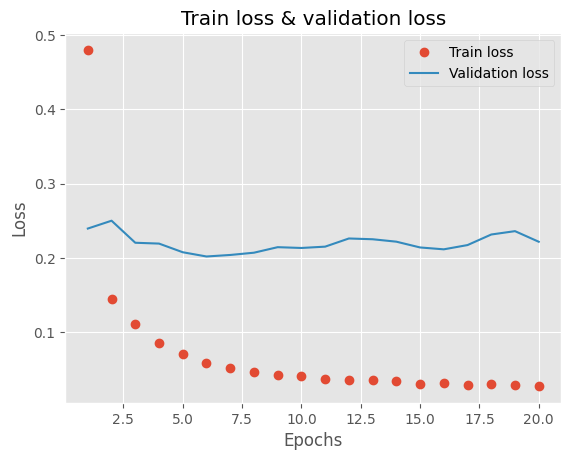

In [46]:
history_dict = history.history
loss_plot(history_dict,epochs=20) # just slightly better than naive approach

## GRU
It is similar to LSTM but less computationally demanding. Therefore it could create worse representation though.

In [52]:
model = Sequential([
    GRU(32, input_shape=(loopback // step, X.shape[-1])),
    Dense(1)
])

model.compile(loss='mse', optimizer='adam')

history = model.fit(
    train_gen,
    epochs=20,
    steps_per_epoch=500,
    validation_data=val_gen,
    validation_steps=val_steps,
    verbose=0
)

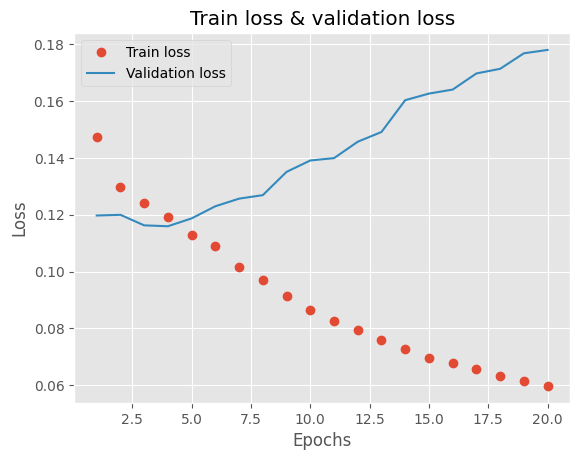

In [53]:
history_dict = history.history
loss_plot(history_dict,epochs=20) # much better solution

## Recurrent dropout to prevent overfitting

In [13]:
model = Sequential([
    GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(loopback // step, X.shape[-1])),
    Dense(1)
])

model.compile(loss='mse', optimizer='adam')

history = model.fit(
    train_gen,
    epochs=40,
    steps_per_epoch=500,
    validation_data=val_gen,
    validation_steps=val_steps,
    verbose=1
)

## Blocks of recurrent layers
Should imporve model if there is no overfitting. It is important to set return_sequence = True

In [15]:
model = Sequential([
    GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(loopback // step, X.shape[-1]), return_sequences=True),
    GRU(64, activation='relu', dropout=0.1, recurrent_dropout=0.5),
    Dense(1)
])

model.compile(loss='mse', optimizer='adam')

history = model.fit(
    train_gen,
    epochs=40,
    steps_per_epoch=500,
    validation_data=val_gen,
    validation_steps=val_steps,
    verbose=1
)

## Biderectional RNNs
NLP is the most popular use case. In weather prediction task it won't be that efficient because we rely more on short-term memory than long-term memory - only chronological order of samples is useful here. 
But for movie review classification task it may perform better than standard RNN.

In [17]:
max_features = 10000
maxlen = 500
batch_size = 32

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

model = Sequential([
    Embedding(max_features, 32),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10


2023-03-16 15:16:52.846969: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401


157/157 [==============================] - 17s 100ms/step - loss: 0.6836 - accuracy: 0.6295 - val_loss: 0.6725 - val_accuracy: 0.6780
Epoch 2/10
157/157 [==============================] - 13s 80ms/step - loss: 0.5936 - accuracy: 0.7452 - val_loss: 0.4853 - val_accuracy: 0.7748
Epoch 3/10
157/157 [==============================] - 10s 64ms/step - loss: 0.3948 - accuracy: 0.8420 - val_loss: 0.3849 - val_accuracy: 0.8328
Epoch 4/10
157/157 [==============================] - 8s 49ms/step - loss: 0.2619 - accuracy: 0.9008 - val_loss: 0.2911 - val_accuracy: 0.8820
Epoch 5/10
157/157 [==============================] - 7s 46ms/step - loss: 0.1905 - accuracy: 0.9331 - val_loss: 0.3016 - val_accuracy: 0.8824
Epoch 6/10
157/157 [==============================] - 7s 44ms/step - loss: 0.1472 - accuracy: 0.9508 - val_loss: 0.3096 - val_accuracy: 0.8786
Epoch 7/10
157/157 [==============================] - 6s 38ms/step - loss: 0.1107 - accuracy: 0.9658 - val_loss: 0.3404 - val_accuracy: 0.8778
Epoch 

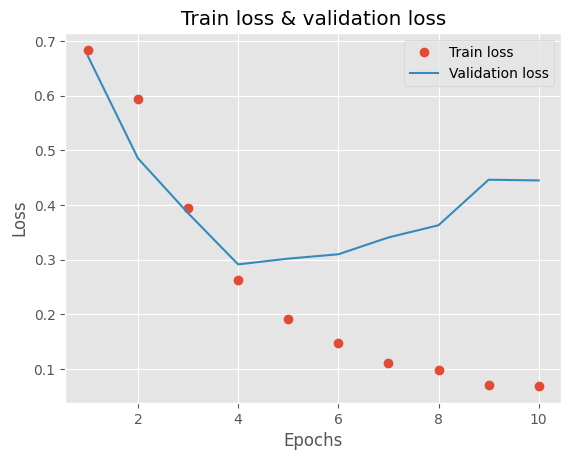

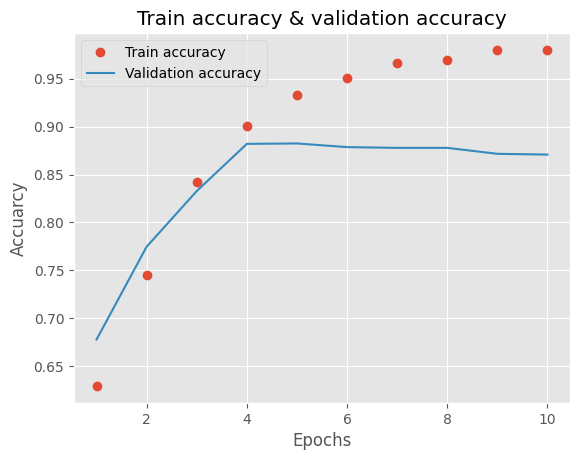

In [19]:
history_dict = history.history
loss_plot(history_dict,epochs=10)
acc_plot(history_dict, epochs=10)